<h2 style="color:red"> Exercício 1 </h2>

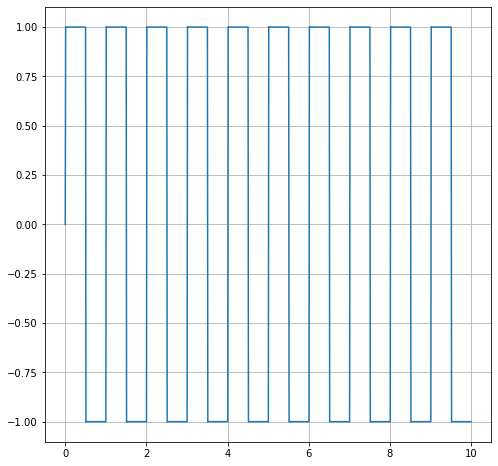

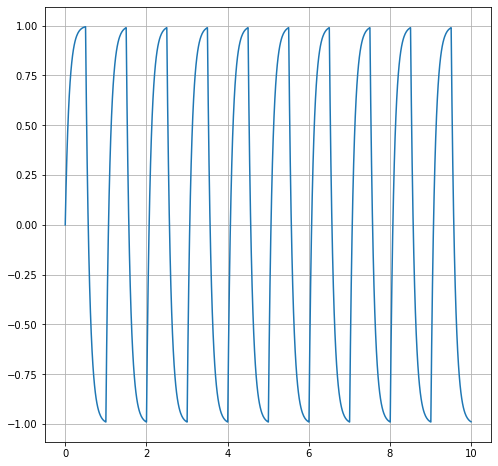

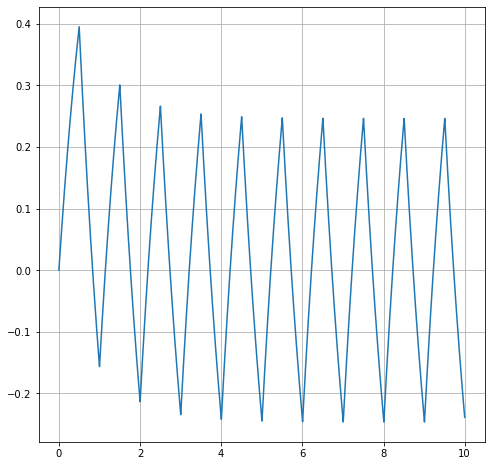

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Função de entrada
def Vin(t):
    return 1 if int(2 * t) % 2 == 0 else -1


# Lado direito equação diferencial
def f_out(t, Vout, RC):
    return 1 / RC * (Vin(t) - Vout)

RC_list = np.array([0.01, 0.1, 1], float)

# Método de euler
def euler(n, RC):
    t_min, t_max = 0, 10
    dt = (t_max - t_min) / (n - 1)
    t_list = np.linspace(t_min, t_max, n)
    Vout_list = np.empty(n)
    Vout = 0
    
    for i in range(n):
        Vout_list[i] = Vout
        Vout += dt * f_out(t_list[i], Vout, RC)
        
    return t_list, Vout_list

# Plots
for RC in RC_list:
    plt.figure(figsize=(8,8))
    t, Vout = euler(1000, RC)
    plt.plot(t, Vout)
    plt.grid()
    plt.show()

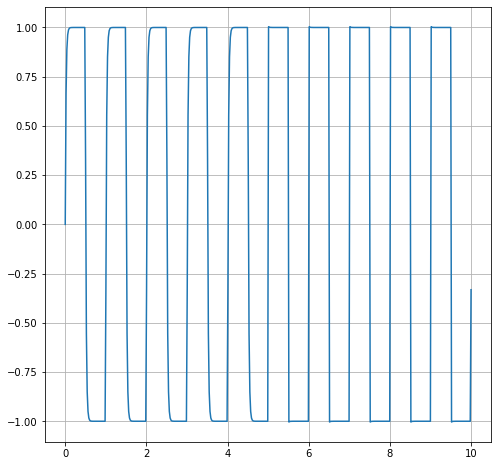

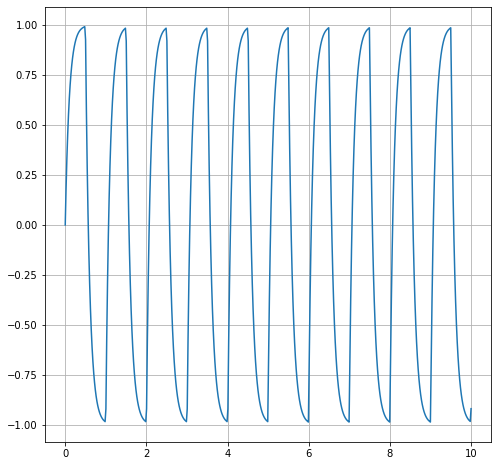

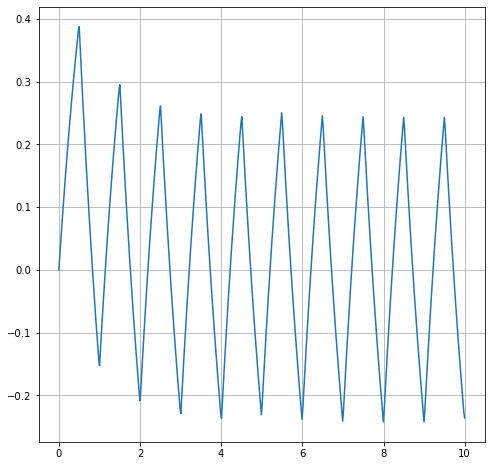

In [27]:
def runge_kutta_4(n, RC):
    t_min, t_max = 0, 10
    dt = (t_max - t_min) / (n - 1)
    t_list = np.linspace(t_min, t_max, n)
    Vout_list = np.empty(n)
    Vout = 0
    
    for i in range(n):
        Vout_list[i] = Vout
        k1 = dt * f_out(t_list[i], Vout, RC)
        k2 = dt * f_out(t_list[i] + 0.5 * dt, Vout + 0.5 * k1, RC)
        k3 = dt * f_out(t_list[i] + 0.5 * dt, Vout + 0.5 * k2, RC)
        k4 = dt * f_out(t_list[i] + dt, Vout + k3, RC)
        Vout += (k1 + 2 * k2 + 2 * k3 + k4) / 6 
        
    return t_list, Vout_list

# Plots
for RC in RC_list:
    plt.figure(figsize=(8,8))
    t, Vout = runge_kutta_4(500, RC)
    plt.plot(t, Vout)
    plt.grid()
    plt.show()

<h2 style="color:red"> Exercício 4 </h2>

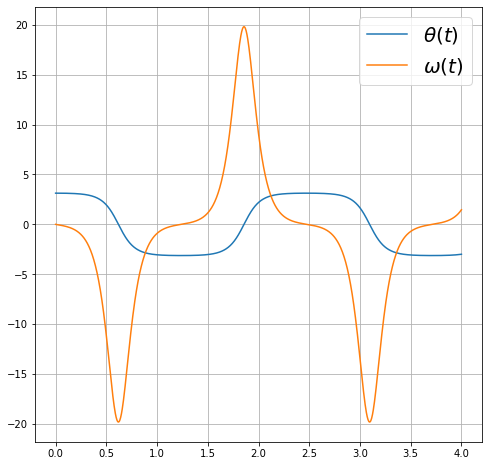

In [69]:
# Equação real

g, l = 9.8, 0.1
aux = np.empty(2, float)
def f_aux(t, r):
    aux[0] = r[1] 
    aux[1] = - g / l * np.sin(r[0])
    return aux

def runge_kutta_4_multiple(n):
    
    t_max = 4
    dt = t_max / (n - 1)
    t_list = np.linspace(0, t_max, n)
    r = np.array([179 * np.pi / 180, 0], float)
    r_matrix = np.empty([n, 2], float)
    
    for i in range(n):
        r_matrix[i] = r
        k1 = dt * f_aux(t_list[i], r)
        k2 = dt * f_aux(t_list[i] + 0.5 * dt, r + 0.5 * k1)
        k3 = dt * f_aux(t_list[i] + 0.5 * dt, r + 0.5 * k2)
        k4 = dt * f_aux(t_list[i] + dt, r + k3)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6 
    
    return t_list, r_matrix[: ,0], r_matrix[:, 1]

t, theta, omega = runge_kutta_4_multiple(1000)
plt.figure(figsize=(8,8))
plt.plot(t, theta, label=r"$\theta (t)$")
plt.plot(t, omega, label=r"$\omega (t)$")
plt.legend(fontsize=20)
plt.grid()
plt.show()

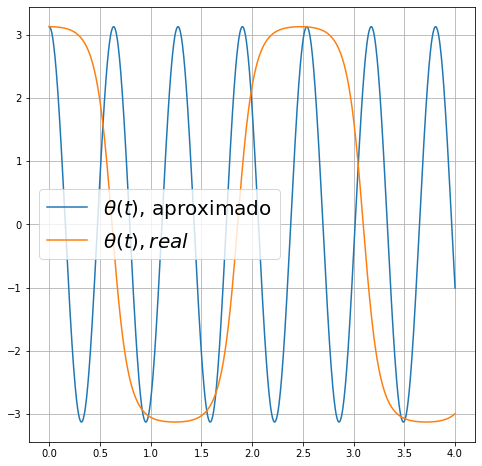

In [70]:
# Equação aproximada

g, l = 9.8, 0.1
c = np.zeros((2,2), float)
c[0][1] = 1
c[1][0] = -g / l

def f_aux(t, r):
    return c @ r

t1, theta1, omega1 = runge_kutta_4_multiple(1000)
plt.figure(figsize=(8,8))
plt.plot(t1, theta1, label=r"$\theta (t)$, aproximado")
plt.plot(t, theta, label=r"$\theta (t), real$")
#plt.plot(t, omega, label=r"$\omega (t)$")
plt.legend(fontsize=20)
plt.grid()
plt.show()

<h2 style="color:red"> Método de Shooting </h2>

In [91]:
def f_shooting(r):
    return np.array([r[1], -9.8])

def runge_kutta_shooting(vy, n=1000):
    t_max = 2
    dt = t_max / (n - 1)
    t_list = np.linspace(0, t_max, n)
    r = np.array([0, vy], float)
    r_matrix = np.empty([n, 2], float)
    
    for i in range(n):
        r_matrix[i] = r
        k1 = dt * f_shooting(r)
        k2 = dt * f_shooting(r + 0.5 * k1)
        k3 = dt * f_shooting(r + 0.5 * k2)
        k4 = dt * f_shooting(r + k3)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6 
    
    vy_list = r_matrix[:, 1]
    y_list = r_matrix[: ,0]
    return y_list[-1]

print(runge_kutta_shooting(9.8, n=1000))

def binary_search(x1, x2 , f, p = 1e-5):
    assert f(x1) < 0, "f(x1) must be negative"
    assert f(x2) > 0, "f(x2) must be positive"
    
    while abs(x2 - x1) > p:
        average = (x1 + x2) / 2
        if f(average) < 0:
            x1 = average
        else:
            x2 = average
            
    return (x2 + x1) / 2

print(binary_search(0, 50, runge_kutta_shooting))

5.94697902034369e-14
9.800001978874207
